# Student Academic Performance 
## Steps in this project
1) Problem Statement
2) Data source and collection
3) Data checking
4) Exploratory data analysis
5) Data pre-processing
6) Model Training and evaluation
7) Choosing the best model 

### 1) Problem statement
The goal of this project is to understand and evaluate how a student's academic performance i.e, test scores is affected by variables such as gender, ethnicity, parent's educational and occupation background, and test preparation course

### 2) Data source 
- Dataset source = https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- The dataset has 8 columns and 1000 rows, indicating 1000 students and 8 feature columns that describes something about each student



####    Dataset Features

1. gender : Male/female
2. race/ethnicity :  Group A, B, C, D, E
3. parental level of education : bachelor's degree,some college,master's degree,associate's degree,high school
4. lunch before test : standard, free or reduced
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

####  Import data and packages

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [286]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Brief overview of the dataset

In [287]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [289]:
df.shape

(1000, 8)

### 3) Data checks 

 


#### check for missing values

In [290]:
df.isna().sum() #this counts for the values that are null in each feature column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### check for duplicates

In [291]:
df.duplicated().sum() #this shows the num of rows that have the same data values

0

#### check number of unique values for each feature

In [292]:
df.nunique() #this shows the unique number of values for each feature in the dataset

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### check the statistics of the data set

In [293]:
df.describe() #this provudes the descriptive statistics for the numerical features

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### *Key Insights from the descriptive statistics
1) The mean scores for the three tests are evenly matched, with reading score being the highest by just 2 points
2) The standard deviation in the score distribution for all three tests are almost the same
3) The lowest minimum score is for maths with the score of 0, whereas the mimimum score for reading is 17, and the minimum score for writing is 10
4) All the three tests have at least one perfect 100 score
5) The first and thrid quartiles for the test scores are evenly matched as well

##### renaming some of the columns 

In [294]:
df = df.rename(columns = {'race/ethnicity': 'race'})

##### Each feature column and its unique values

In [295]:
nominal_cols = df.select_dtypes(include='object').columns #this gets the columns who have values that are ordinal and nominal, not numeric continuos values
print(nominal_cols)


Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [296]:
for x in nominal_cols:
    xx = df[f'{x}'].unique()
    print(f"The unique values in the {x} column are : {xx}")
    print('\n')

The unique values in the gender column are : ['female' 'male']


The unique values in the race column are : ['group B' 'group C' 'group A' 'group D' 'group E']


The unique values in the parental level of education column are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


The unique values in the lunch column are : ['standard' 'free/reduced']


The unique values in the test preparation course column are : ['none' 'completed']




#### Distinguishing between the categorical and numeric columns

In [297]:
contin_cols = [x for x in df.select_dtypes(include=['float', 'int']).columns]
num_cols = [x for y in df.select_dtypes(include='object').columns]

print(f"The dataset has {len(contin_cols)} categorical columns: {contin_cols}")
print(f"The dataset has {len(num_cols)} numerical columns: {num_cols}")

The dataset has 3 categorical columns: ['math score', 'reading score', 'writing score']
The dataset has 5 numerical columns: ['test preparation course', 'test preparation course', 'test preparation course', 'test preparation course', 'test preparation course']


#### Inserting a column for total score of the three test scores and the average of the three test scores

In [298]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3

In [299]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### checking the statistics for the new numeric columns

In [300]:
test_columns = ['reading score', 'writing score', 'math score']

for x in test_columns:
    print(f"The number of students who got full marks in {x}: {df[df[x] == 100]['average score'].count()}")

print('\n')

for x in test_columns:
    print(f"The number of students who got less than or equal to 40 marks in {x}: {df[df[x] <= 40]['average score'].count()}")

print('\n')

for x in test_columns:
    print(f"The number of students who got less than or equal to 20 marks in {x}: {df[df[x] <= 20]['average score'].count()}")

The number of students who got full marks in reading score: 17
The number of students who got full marks in writing score: 14
The number of students who got full marks in math score: 7


The number of students who got less than or equal to 40 marks in reading score: 27
The number of students who got less than or equal to 40 marks in writing score: 35
The number of students who got less than or equal to 40 marks in math score: 50


The number of students who got less than or equal to 20 marks in reading score: 1
The number of students who got less than or equal to 20 marks in writing score: 3
The number of students who got less than or equal to 20 marks in math score: 4


##### Insights from above
1) There are almost double the number of students getting full scores in writing and reading scores than math, indicating more students excel in the non-math subjects
2) There are more students doing worse in math than the other students. 
3) There are a negligible yet a handful of scores below 20 in the subjects, with at the very minimum 4 students that are performing the worst, and at maximum 8

#### 4) Exploratory data analysis (with visualizations)

##### making histograms to observe average score distribution

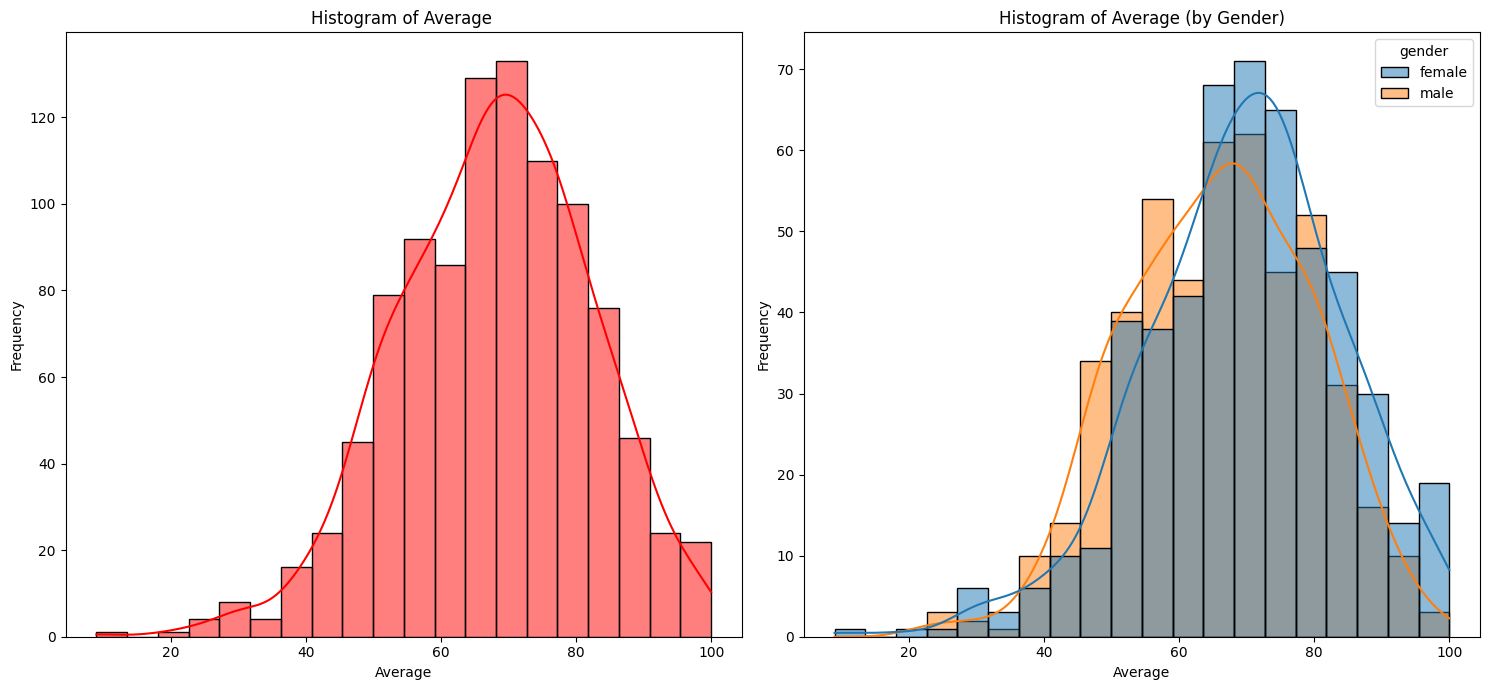

In [301]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(df,x='average score',bins=20,kde=True,color='r',ax = axs[0])
axs[0].set_xlabel('Average')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Average ')

# Second subplot
sns.histplot(df, x='average score', bins=20, kde=True, hue='gender', ax=axs[1])
axs[1].set_xlabel('Average')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Average (by Gender)')

plt.tight_layout()
plt.show()

#### making histograms to observe the total score distribution 

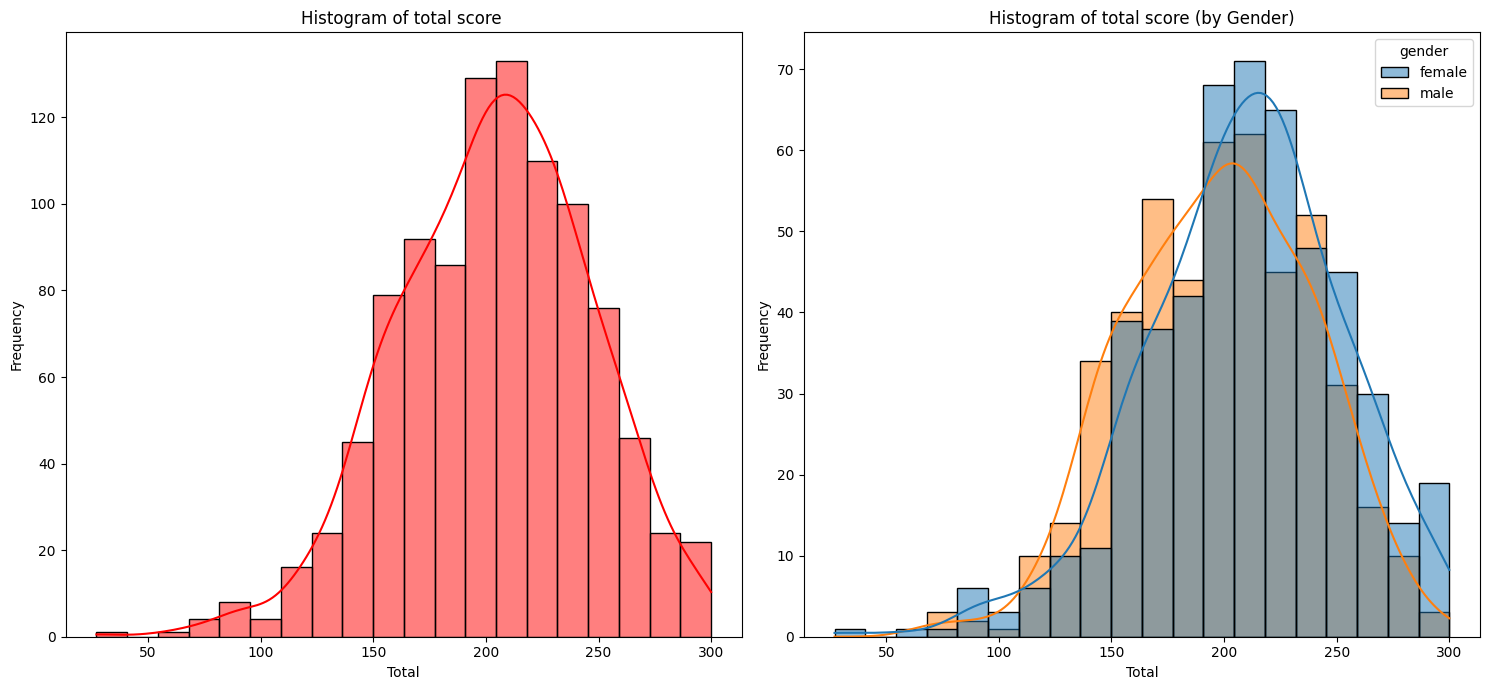

In [302]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(df,x='total score',bins=20,kde=True,color='r',ax = axs[0])
axs[0].set_xlabel('Total')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of total score ')

# Second subplot
sns.histplot(df, x='total score', bins=20, kde=True, hue='gender', ax=axs[1])
axs[1].set_xlabel('Total')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of total score (by Gender)')

plt.tight_layout()
plt.show()

##### Insights
The female students see to be doing better on the test scores than the male students. They tend to have, on average, better scores both in the average and total scores. They also are most of the top scorers, whereas the male students are most of the low scorers.

##### making boxenplots to observe the maximum scores of students in all of the three subjects

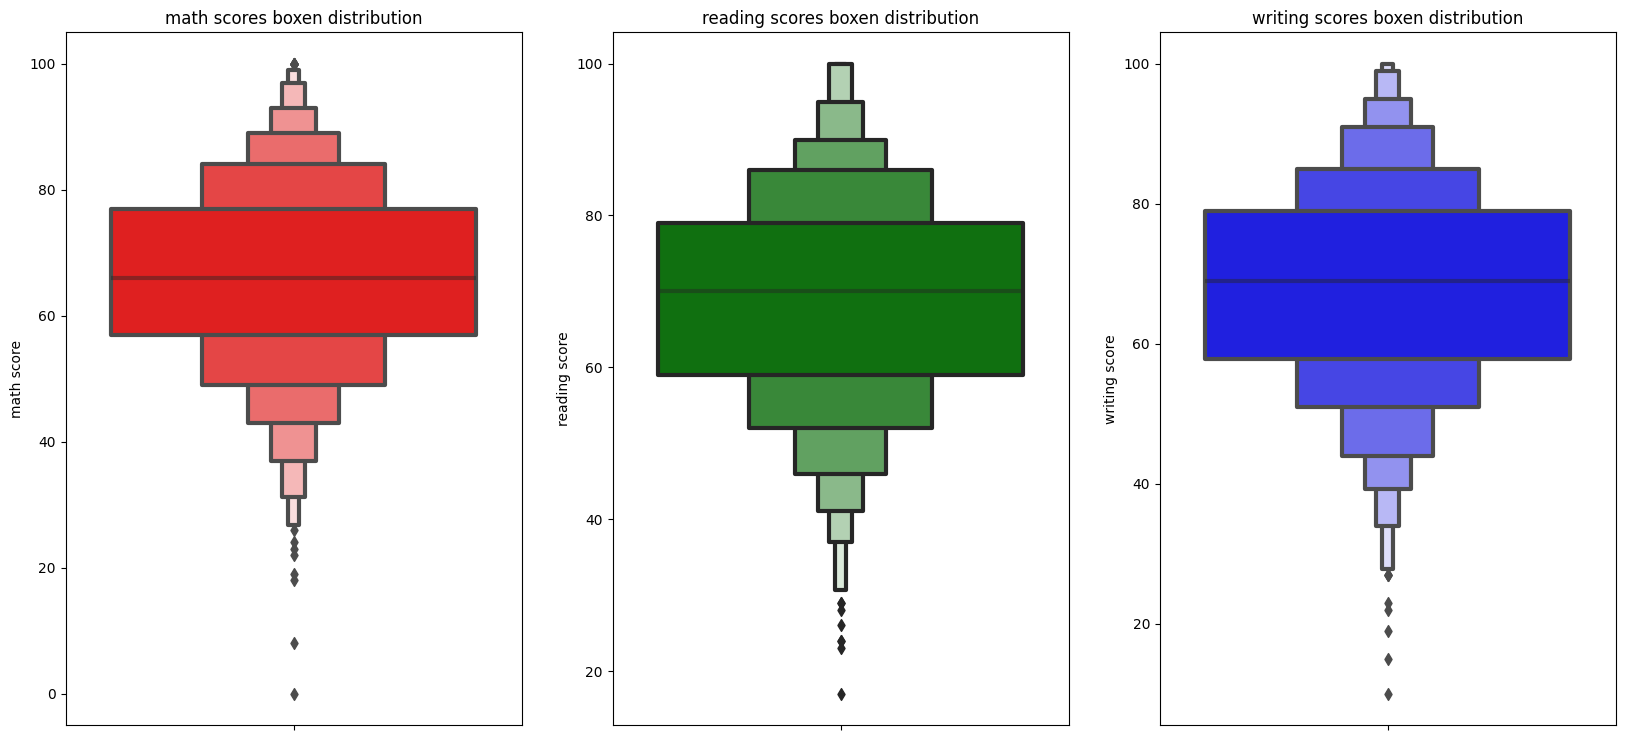

In [303]:
fig, axs = plt.subplots(1, 3, figsize=(20, 9))

axs[0].set_title('math scores boxen distribution')
sns.boxenplot(y='math score',data=df,color='red',linewidth=3, ax = axs[0])


axs[1].set_title('reading scores boxen distribution')
sns.boxenplot(y='reading score',data=df,color='green',linewidth=3, ax = axs[1])

axs[2].set_title('writing scores boxen distribution')
sns.boxenplot(y='writing score',data=df,color='blue',linewidth=3, ax = axs[2])
plt.show()

##### Insights
- The above three plots show that majority of the student fall around the 60-80 score category for all three of the tests. 

##### making histograms for the test scores distribution based on lunch 

<Axes: title={'center': 'male total score distribution based on lunch'}, xlabel='total score', ylabel='Count'>

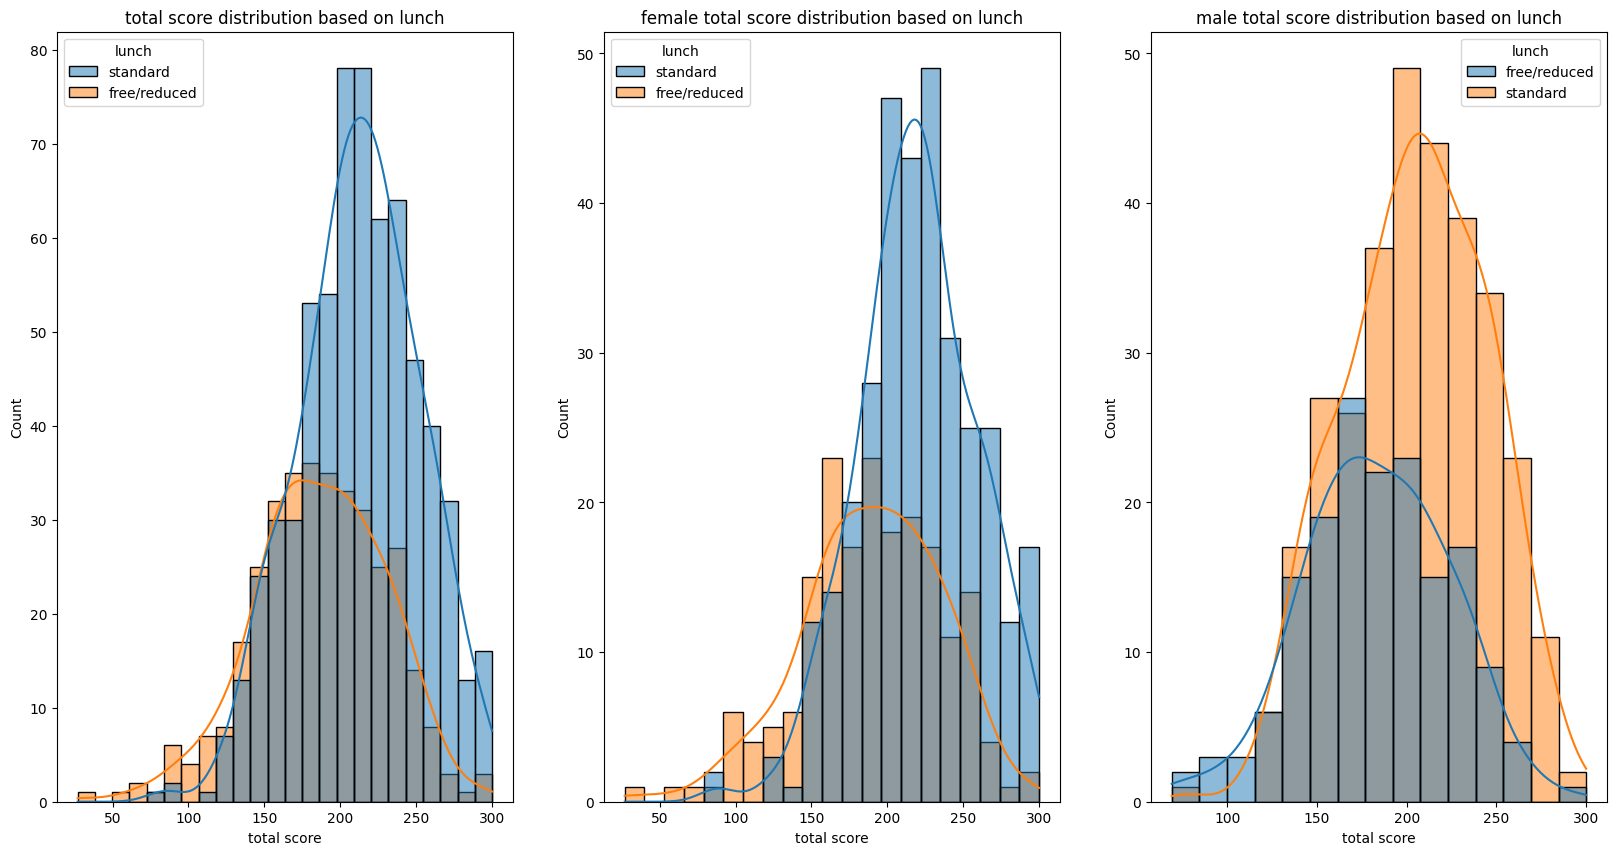

In [304]:
female = df[df['gender'] =='female']
male = df[df['gender'] =='male']

fig , axs = plt.subplots(1,3, figsize= (20, 10))

axs[0].set_title('total score distribution based on lunch')
sns.histplot(data = df, x = 'total score', kde = True, hue = 'lunch', ax = axs[0])

axs[1].set_title('female total score distribution based on lunch')
sns.histplot(data = female, x = 'total score', kde = True, hue = 'lunch', ax = axs[1])

axs[2].set_title('male total score distribution based on lunch')
sns.histplot(data = male, x = 'total score', kde = True, hue = 'lunch', ax = axs[2])

#### Insights 

- Based on the above plots, the students with the standard lunch plans tend to perform , on average, much better than the students with the free or reduced plans.
- The female students with standard lunch plans outferform the female students with the free or reduced lunch plans.
- The male students, on the other hand, seem to have the converse with majority of the students with the free or reduced lunch plans outperforming the students with the standard lunch plans

#### making histograms for the test scores distribution based on race/ethnicity

<Axes: title={'center': 'male total score distribution based on race/ethnicity'}, xlabel='total score', ylabel='Count'>

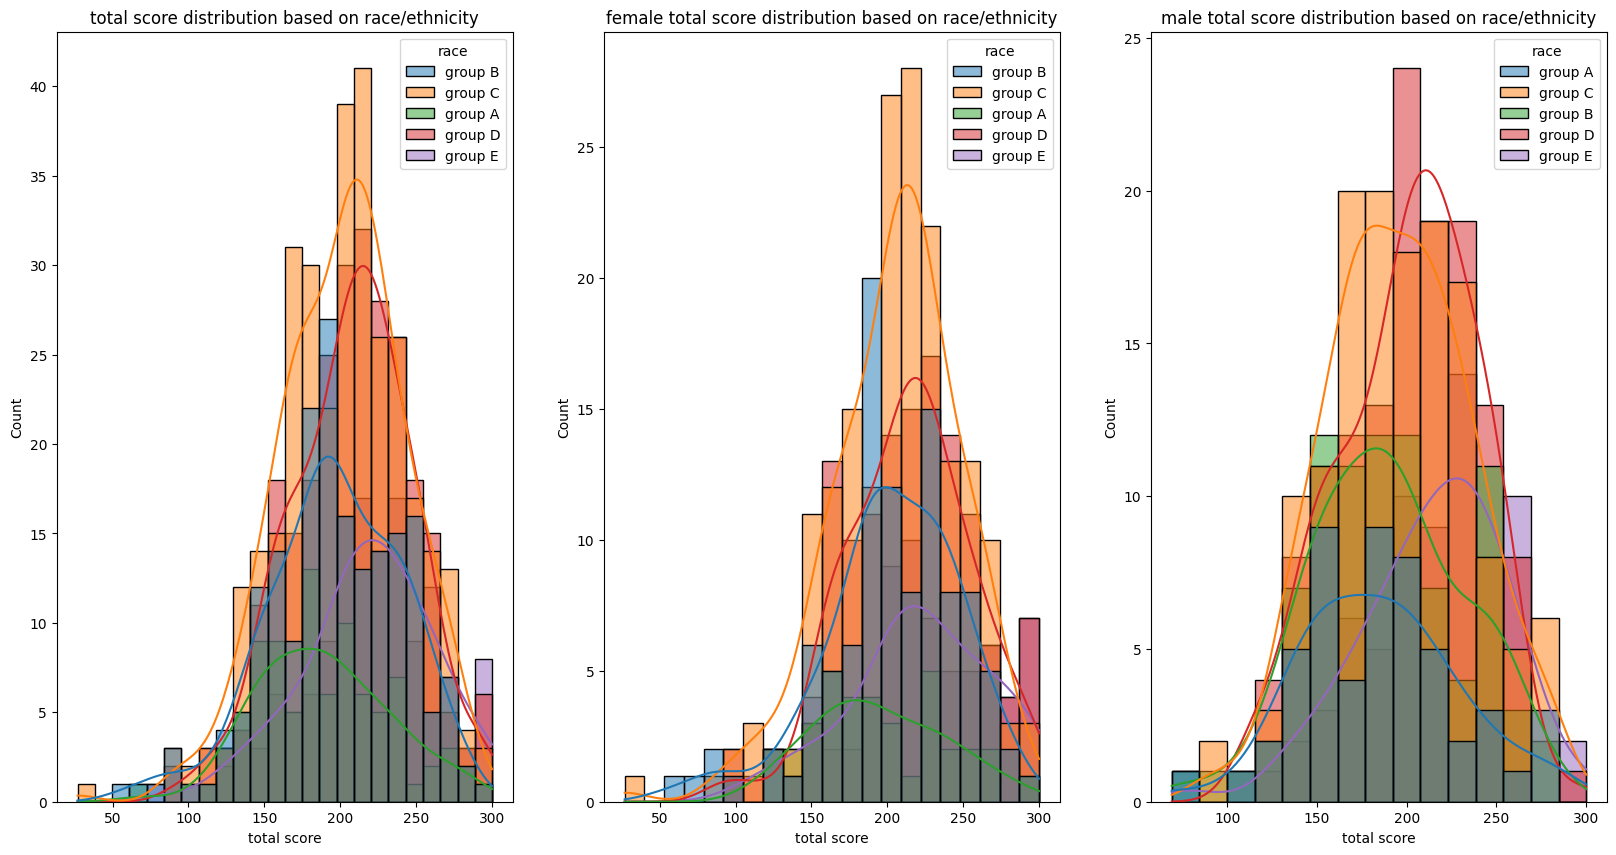

In [305]:
female = df[df['gender'] =='female']
male = df[df['gender'] =='male']

fig , axs = plt.subplots(1,3, figsize= (20, 10))

axs[0].set_title("total score distribution based on race/ethnicity")
sns.histplot(data = df, x = 'total score', kde = True, hue = 'race', ax = axs[0])

axs[1].set_title("female total score distribution based on race/ethnicity")
sns.histplot(data = female, x = 'total score', kde = True, hue = 'race', ax = axs[1])

axs[2].set_title("male total score distribution based on race/ethnicity")
sns.histplot(data = male, x = 'total score', kde = True, hue = 'race', ax = axs[2])

In [306]:
df['race'].value_counts()

race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

##### insights
- Group A and Group B tend to perform the worst. Group A has the least number of student population as well.

##### making pie plots to observe the distributionn of the all the features simultaneously

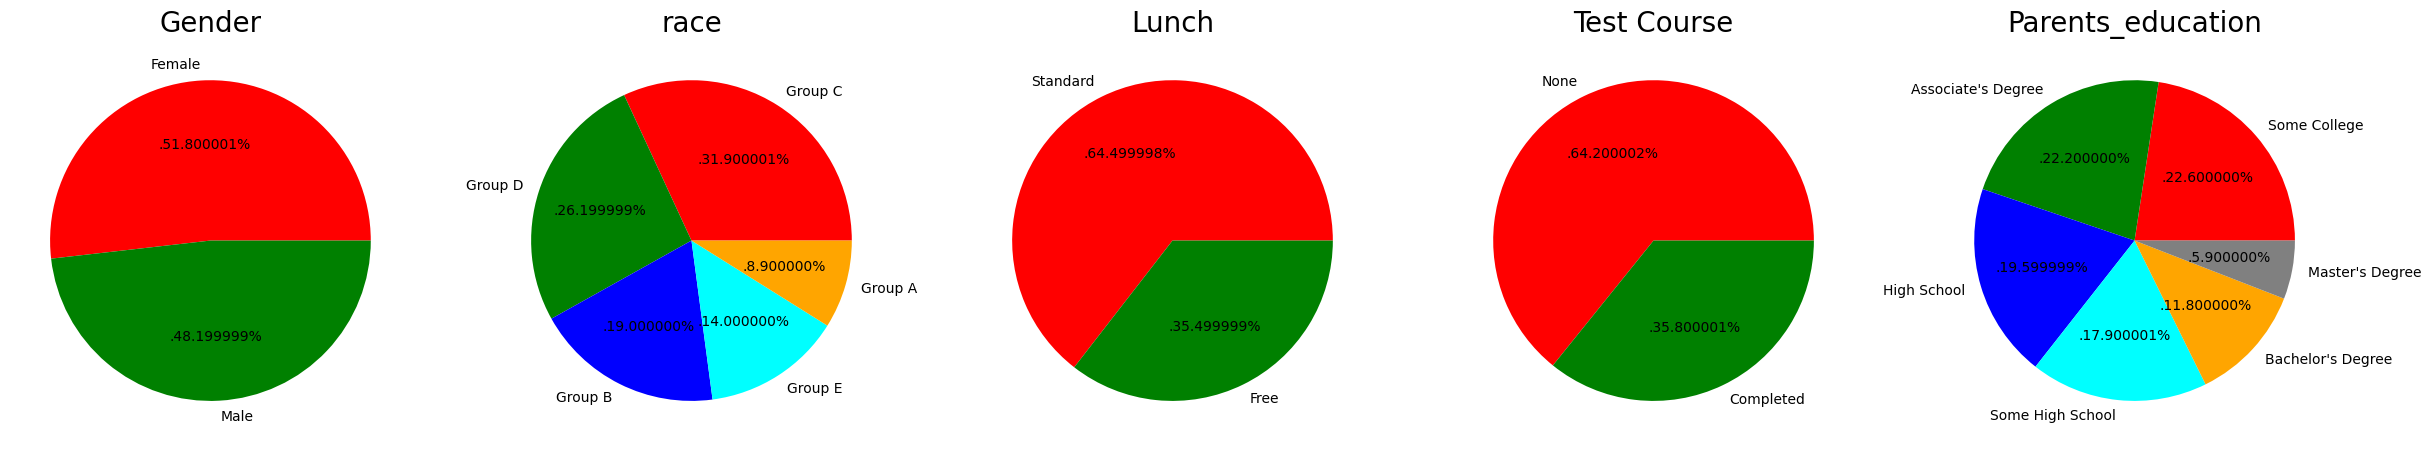

In [307]:
fig , axs = plt.subplots(1,5, figsize= (30, 15))

########## Pieplot for gender distribution
gender = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
axs[0].pie(gender, colors = color, labels = labels,autopct = '.%2f%%')
axs[0].set_title('Gender', fontsize = 20)
########### 


########### Pieplot for race distribution
race = df['race'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
axs[1].pie(race, colors = color,labels = labels,autopct = '.%2f%%')
axs[1].set_title('race', fontsize = 20)
############


############ Pieplot for lunch distribution
lunch = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
axs[2].pie(lunch, colors = color,labels = labels,autopct = '.%2f%%')
axs[2].set_title('Lunch', fontsize = 20)
############


############# Pieplot for test prep distribution
test_prep = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
axs[3].pie(test_prep, colors = color,labels = labels,autopct = '.%2f%%')
axs[3].set_title('Test Course', fontsize = 20)
##############


############## Pieplot for parent's education distribution
parents_edu = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
axs[4].pie(parents_edu, colors = color,labels = labels,autopct = '.%2f%%')
axs[4].set_title('Parents_education', fontsize = 20)
############

plt.show()

##### Insights
1) There are almost the same number of male and female students
2) There are most number of students in Group C. Almost more than 60% of students are comprised by Group D and Group C
3) Almost 2/3 of the students have standard lunch program, and the rest 1/3 of the students have the free lunch program. 
4) Almost 2/3 of the students have no test preparation course taken, and the rest 1/3 of the students are enrolled in one.
5) The number of the students whose parents have some college education are the most, followed by associate's degree.

##### Does gender have any impact on any student's academic performance [ a bivariate analysis question]

In [308]:
numeric_cols = df.select_dtypes(include='number')
gender_group = numeric_cols.groupby(df['gender']).mean()
gender_group


,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


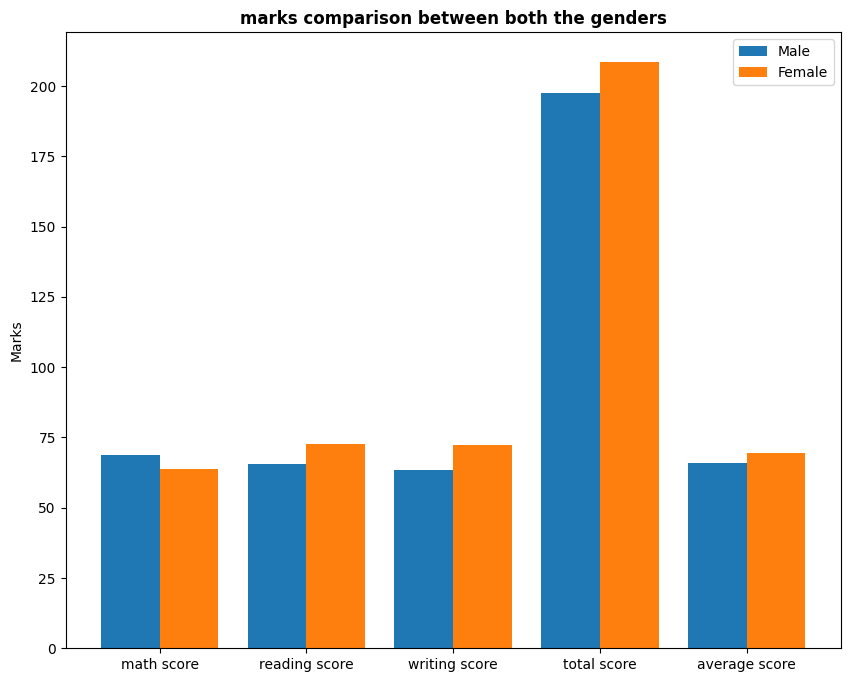

In [309]:
plt.figure(figsize=(10, 8))

cols = gender_group.columns

female_scores = [gender_group['math score'][0], gender_group['reading score'][0], gender_group['writing score'][0], gender_group['total score'][0], gender_group['average score'][0]]
male_scores = [gender_group['math score'][1], gender_group['reading score'][1], gender_group['writing score'][1], gender_group['total score'][1], gender_group['average score'][1]]

X_axis = np.arange(len(cols))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

  
plt.xticks(X_axis, cols)
plt.ylabel("Marks")
plt.title("marks comparison between both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
1) The female students are doing, on average, better than the male students on the reading and writing tests, whereas the male students are scoring higher in for maths
2) The female students are scoring higher, on average, higher in the total scores by 11 marks than the male students

##### Does race/ethnicity have any impact on any student's academic performance [ a bivariate analysis question]

In [310]:
numeric_cols = df.select_dtypes(include='number')
race_group = numeric_cols.groupby(df['race']).mean()
race_group

,math score,reading score,writing score,total score,average score
race,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


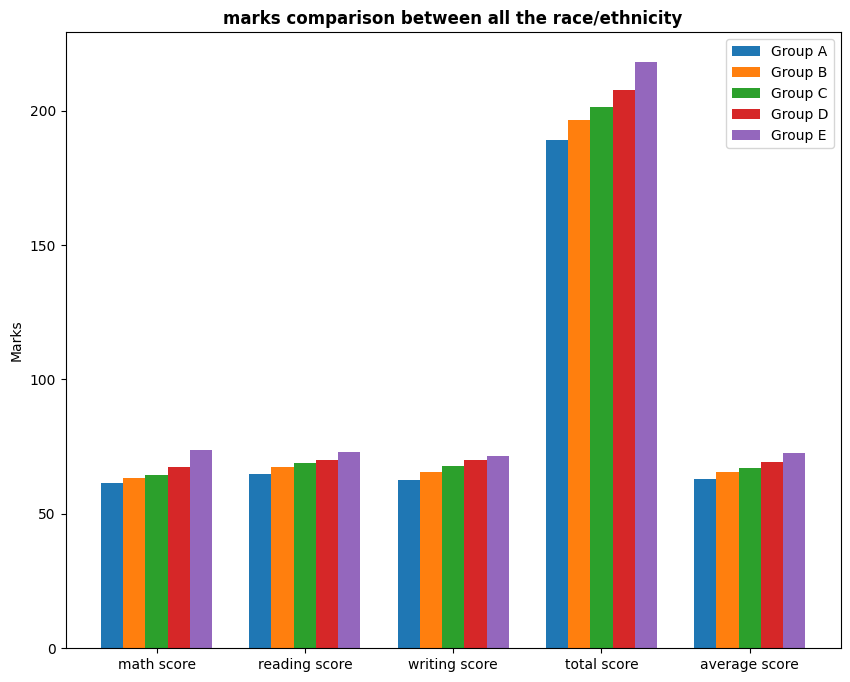

In [311]:
plt.figure(figsize=(10, 8))

cols = race_group.columns

groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
# Create an empty list to store scores for each group
group_scores = []

#this get a list of values for each race/ethncity
for i in range(5):
    scores = [race_group[col][i] for col in cols]
    group_scores.append(scores)

X_axis = np.arange(len(cols))
bar_width = 0.15

# Plotting the bars for each group using a loop
for i in range(5):
    plt.bar(X_axis + (i - 2) * bar_width, group_scores[i], bar_width, label=groups[i])

  
plt.xticks(X_axis, cols)
plt.ylabel("Marks")
plt.title("marks comparison between all the race/ethnicity", fontweight='bold')
plt.legend()
plt.show()

##### Insights
1) Group E has been the best performer in terms of all the racial groups and all the tests as well
2) Group A has been the lowest performer in terms of all the racial groups and all the tests as well 

##### Does lunch prep have any impact on any student's academic performance [ a bivariate analysis question]

In [312]:
numeric_cols = df.select_dtypes(include='number')
lunch_group = numeric_cols.groupby(df['lunch']).mean()
lunch_group

,math score,reading score,writing score,total score,average score
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


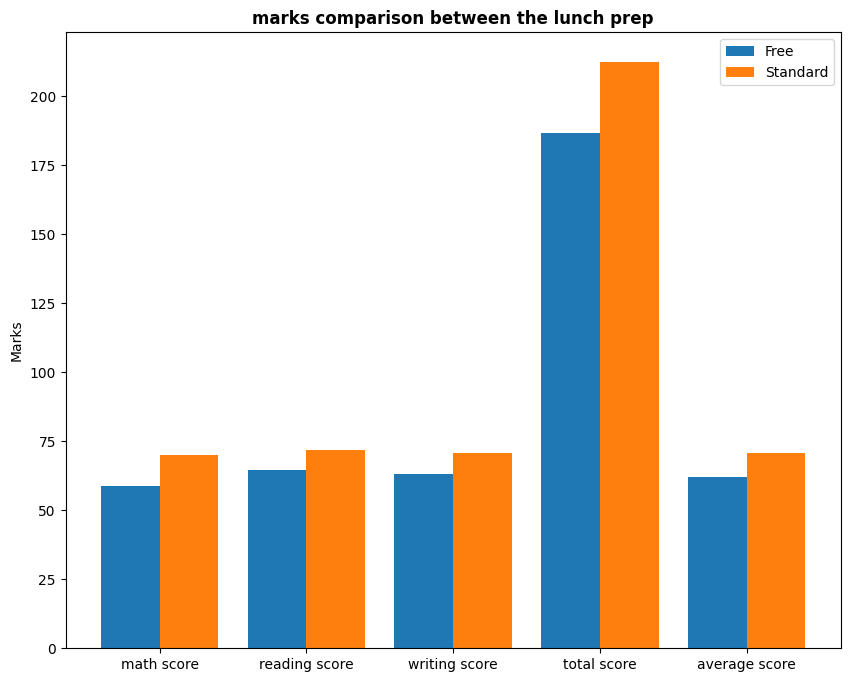

In [313]:
plt.figure(figsize=(10, 8))

cols = race_group.columns

groups = ['free/reduced', 'standard']
# Create an empty list to store scores for each group
group_scores = []

#this get a list of values for each race/ethncity
for i in range(2):
    scores = [lunch_group[col][i] for col in cols]
    group_scores.append(scores)

X_axis = np.arange(len(cols))
bar_width = 0.15

# Plotting the bars for each group
plt.bar(X_axis - 0.2, group_scores[0], 0.4, label = 'Free')
plt.bar(X_axis + 0.2, group_scores[1], 0.4, label = 'Standard')

  
plt.xticks(X_axis, cols)
plt.ylabel("Marks")
plt.title("marks comparison between the lunch prep", fontweight='bold')
plt.legend()
plt.show()

##### Insights
1) Students who get a standard lunch prep tend to do much better academically in terms of all the tests and as well as total scores.

##### Does test prep have any impact on any student's academic performance [ a bivariate analysis question]

In [314]:
numeric_cols = df.select_dtypes(include='number')
test_group = numeric_cols.groupby(df['test preparation course']).mean()
test_group

,math score,reading score,writing score,total score,average score
test preparation course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


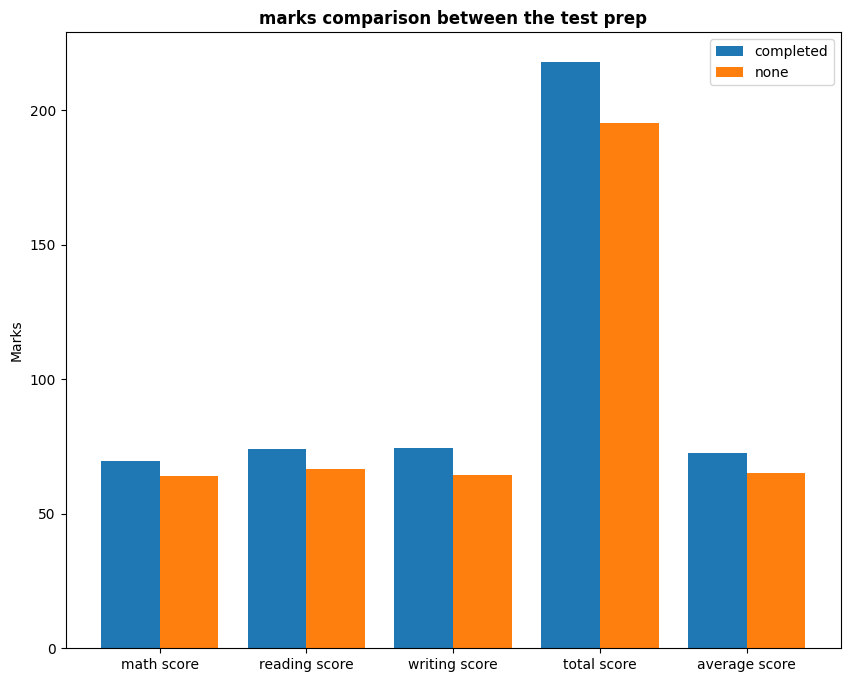

In [315]:
plt.figure(figsize=(10, 8))

cols = race_group.columns

groups = ['completed', 'none']
# Create an empty list to store scores for each group
group_scores = []

#this get a list of values for each race/ethncity
for i in range(2):
    scores = [test_group[col][i] for col in cols]
    group_scores.append(scores)

X_axis = np.arange(len(cols))
bar_width = 0.15

# Plotting the bars for each group
plt.bar(X_axis - 0.2, group_scores[0], 0.4, label = 'completed')
plt.bar(X_axis + 0.2, group_scores[1], 0.4, label = 'none')

  
plt.xticks(X_axis, cols)
plt.ylabel("Marks")
plt.title("marks comparison between the test prep", fontweight='bold')
plt.legend()
plt.show()

##### Insights
1) Students who have taken test prep course tend to perform above better than those who have'nt in all the tests as well as the totals and averages

##### Does parental level of education have any impact on any student's academic performance [ a bivariate analysis question]

In [316]:
numeric_cols = df.select_dtypes(include='number')
parent_group = numeric_cols.groupby(df["parental level of education"]).mean()
parent_group

,math score,reading score,writing score,total score,average score
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


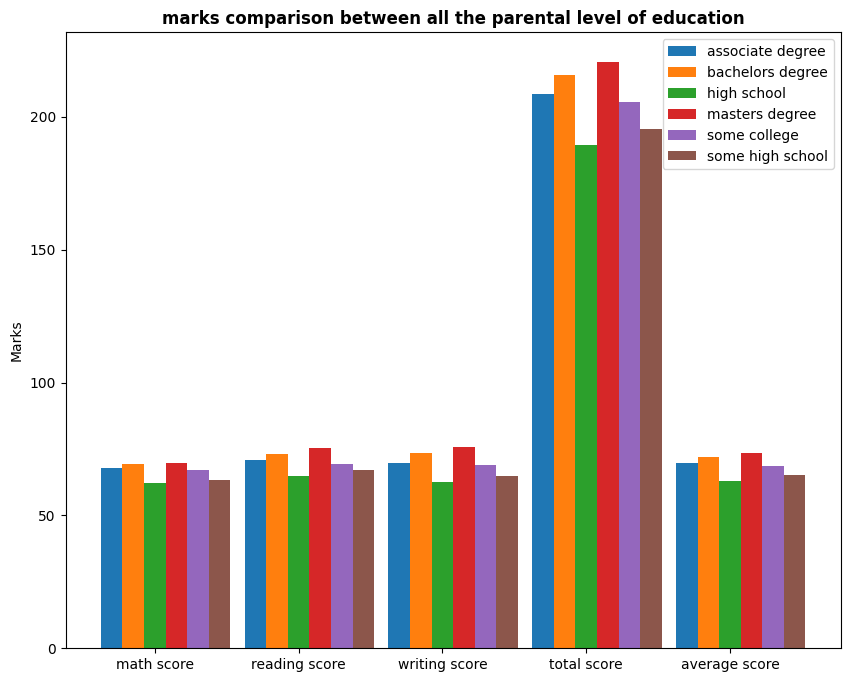

In [317]:
plt.figure(figsize=(10, 8))

cols = race_group.columns

groups = ['associate degree', 'bachelors degree', 'high school', 'masters degree', 'some college', 'some high school']

# Create an empty list to store scores for each group
group_scores = []

#this get a list of values for each race/ethncity
for i in range(6):
    scores = [parent_group[col][i] for col in cols]
    group_scores.append(scores)

X_axis = np.arange(len(cols))
bar_width = 0.15

# Plotting the bars for each group using a loop
for i in range(6):
    plt.bar(X_axis + (i - 2) * bar_width, group_scores[i], bar_width, label=groups[i])

  
plt.xticks(X_axis, cols)
plt.ylabel("Marks")
plt.title("marks comparison between all the parental level of education", fontweight='bold')
plt.legend()
plt.show()

##### insights
1) Students with parents that have either a bachelors or a masters degree tend to do better academically compared to other
2) Students with parents that have a high school degree tend to do the worst academically compared to other

#### Outliers

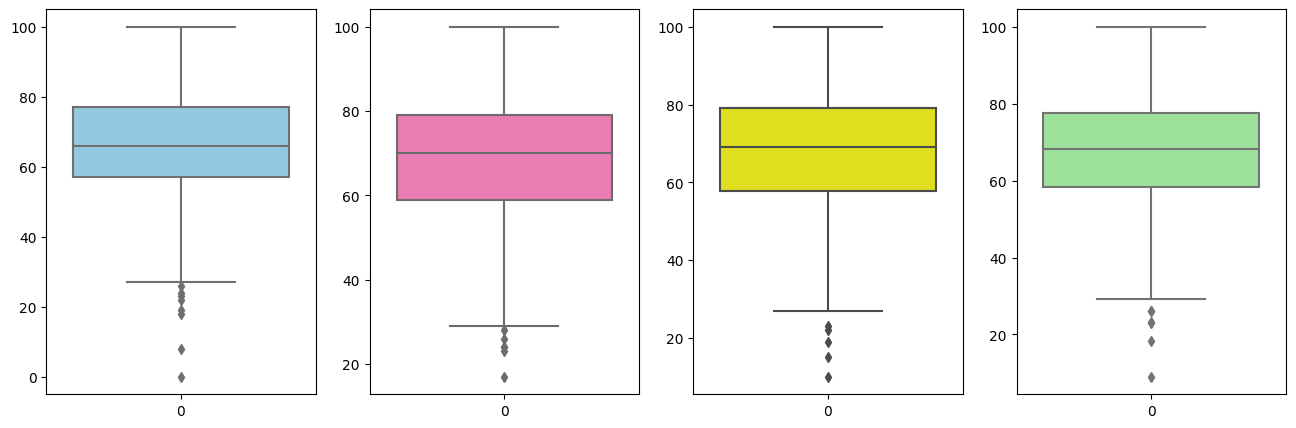

In [318]:
fig, axs = plt.subplots(1,4,figsize=(16,5))

sns.boxplot(df['math score'],color='skyblue', ax = axs[0])
sns.boxplot(df['reading score'],color='hotpink', ax = axs[1])
sns.boxplot(df['writing score'],color='yellow', ax = axs[2])
sns.boxplot(df['average score'],color='lightgreen', ax = axs[3])
plt.show()

##### Insights
1) The lowest outliers seem to be identical among all the test scores
2) The outliers for the math test seem to have a higher average score compared to the other tests

Conclusions

1. Female students tend to outperform and be the top scorers. 

2. The academic performance of students seem to get better when paired with good lunch and test preparation

##### Exporting the dataframe into a csv to use for model training

In [319]:
df.to_csv('data/stud_perf_model.csv', index = False)

In [320]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
